# IMPORTING DATASET AND IMPORTANT LIBRARIES
## READING & ANALYZING THE DATASET

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**UNZIPPING THE DATASET**

In [0]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/DATASETS/pima-indians-diabetes-database.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


**IMPORTING THE LIBRARIES**

In [0]:
import numpy as np 

# data processing

import pandas as pd 
import numpy as np

# data visualization

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import plotly.graph_objs as go
import plotly.offline as py
from sklearn.pipeline import Pipeline


from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [0]:
df=pd.read_csv("diabetes.csv")

**VISUALIZING THE DATASET**

In [0]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
723,5,117,86,30,105,39.1,0.251,42,0
175,8,179,72,42,130,32.7,0.719,36,1
270,10,101,86,37,0,45.6,1.136,38,1
10,4,110,92,0,0,37.6,0.191,30,0
548,1,164,82,43,67,32.8,0.341,50,0
542,10,90,85,32,0,34.9,0.825,56,1
332,1,180,0,0,0,43.3,0.282,41,1
523,9,130,70,0,0,34.2,0.652,45,1
673,3,123,100,35,240,57.3,0.880,22,0
326,1,122,64,32,156,35.1,0.692,30,1


**CHECKING NULL VALUES**

In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
print(df.isnull().count())

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


In [0]:
median= df.median()
print(median)

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


In [0]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [0]:
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

## There are "0" values in the rows where there cannot be "0" , so we fill them with the column median

In [0]:
dataset=df.copy()

In [0]:

median_bmi = dataset['BMI'].median()
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = dataset['BloodPressure'].median()
dataset['BloodPressure'] = dataset['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)


median_age = dataset['Age'].median()
dataset['Age'] = dataset['Age'].replace(
    to_replace=0, value=median_age)

median_skinthick = dataset['SkinThickness'].median()
dataset['SkinThickness'] = dataset['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

median_pregnency = dataset['Pregnancies'].median()
dataset['Pregnancies'] = dataset['Pregnancies'].replace(
    to_replace=0, value=median_pregnency)

median_Glucose = dataset['Glucose'].median()
dataset['Glucose'] = dataset['Glucose'].replace(
    to_replace=0, value=median_Glucose)

median_Insulin = dataset['Insulin'].median()
dataset['Insulin'] = dataset['Insulin'].replace(
    to_replace=0, value=median_Insulin)

median_DiabetesPedigreeFunction = dataset['DiabetesPedigreeFunction'].median()
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].replace(
    to_replace=0, value=median_DiabetesPedigreeFunction)


In [0]:
df1=dataset.copy()

In [0]:
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# TRAINING THE MODEL
##Splitting into Train and Test Dataset

In [0]:
x=df.copy()
x.drop('Outcome',axis=1,inplace=True)
y=df['Outcome']

## Getting the Optimum Random State value so that every time the same test train split is done for the optimum accuracy value.


In [0]:
from sklearn.model_selection import train_test_split
ts_score=[]
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
  lr = RandomForestClassifier().fit(x_train, y_train)
  ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
print(k)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

82


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

# SPLITING THE MODEL

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2, random_state=k )

In [0]:
x_train,y_train=train[train.columns[0:8]],train[train.columns[8]]

# TRAINING MODEL
##RANDOM FOREST 





**TRAIN & TEST ACCURACY**

In [0]:
clc=RandomForestClassifier(n_estimators=100, max_depth=3,random_state=82)
clc.fit(x_train, y_train)
accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.27 %.


**CHECKING ACCURACY THROUGH DIFFERENT MODELS**

In [0]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(x_train, y_train)
    prediction=model.predict(x_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



,Accuracy
Linear Svm,0.811688
Radial Svm,0.785714
Logistic Regression,0.785714
KNN,0.844156
Decision Tree,0.902597


# FEATURE IMPORTANCE

In [0]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=82)
X=df[df.columns[:8]]
Y=df['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.263556
BMI                         0.165778
Age                         0.135864
DiabetesPedigreeFunction    0.124034
BloodPressure               0.086697
Pregnancies                 0.083393
Insulin                     0.074197
SkinThickness               0.066480
dtype: float64

# PLOTTING
## HEAT MAP

In [0]:
corr = df1.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


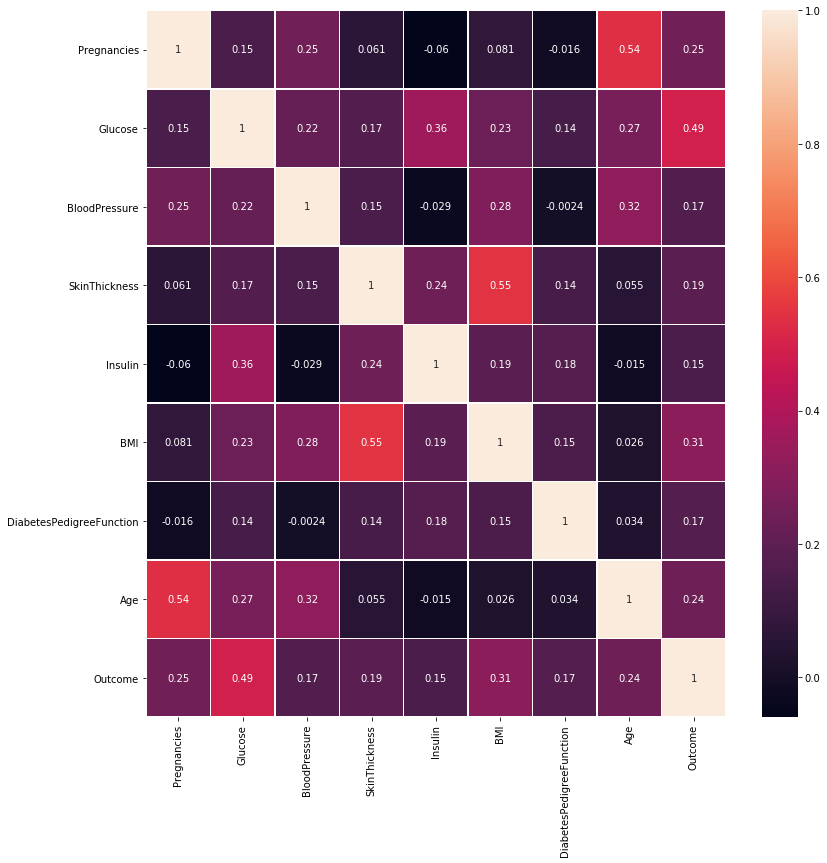

In [0]:
%matplotlib inline
import seaborn as sns
f,ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr, annot = True,linewidths=0.5,)

## HISTOGRAM PLOT

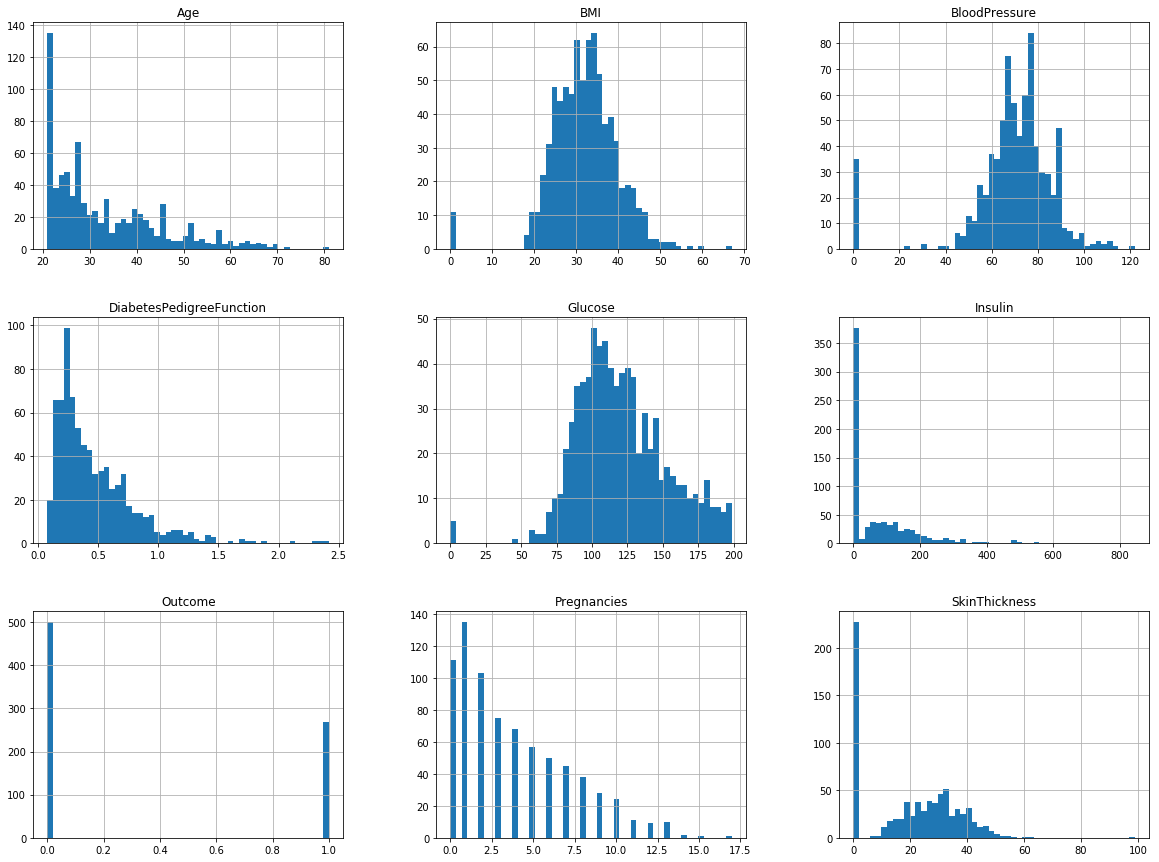

In [0]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

# FEATURE ENGINEERING
## CREATING NEW FEATURES


In [0]:
df1['BMI_SKIN']=df['BMI']+df1['SkinThickness']
df1['AGE_DPF']=df['Age']*df1['DiabetesPedigreeFunction']
df1['PREG_AGE']=df['Pregnancies']/df1['Age']
df1['GLU_INSULIN']=df['Glucose']+df1['Insulin']
df1['GLU_DPF']=df['Glucose']/df1['DiabetesPedigreeFunction']

In [0]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_SKIN,AGE_DPF,PREG_AGE,GLU_INSULIN,GLU_DPF
0,6,148,72,35,30.5,33.6,0.627,50,1,68.6,31.350,0.120000,178.5,236.044657
1,1,85,66,29,30.5,26.6,0.351,31,0,55.6,10.881,0.032258,115.5,242.165242
2,8,183,64,23,30.5,23.3,0.672,32,1,46.3,21.504,0.250000,213.5,272.321429
3,1,89,66,23,94.0,28.1,0.167,21,0,51.1,3.507,0.047619,183.0,532.934132
4,3,137,40,35,168.0,43.1,2.288,33,1,78.1,75.504,0.000000,305.0,59.877622


## Dropping un-important features

In [0]:
df1.drop('SkinThickness',axis=1,inplace=True)
df1.drop('Insulin',axis=1,inplace=True)

# Splitting into Train Test model and checking Accuracy

In [0]:
x=df1.copy()
x.drop('Outcome',axis=1,inplace=True)
y=df1['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,BMI_SKIN,AGE_DPF,PREG_AGE,GLU_INSULIN,GLU_DPF
0,6,148,72,33.6,0.627,50,68.6,31.350,0.120000,178.5,236.044657
1,1,85,66,26.6,0.351,31,55.6,10.881,0.032258,115.5,242.165242
2,8,183,64,23.3,0.672,32,46.3,21.504,0.250000,213.5,272.321429
3,1,89,66,28.1,0.167,21,51.1,3.507,0.047619,183.0,532.934132
4,3,137,40,43.1,2.288,33,78.1,75.504,0.000000,305.0,59.877622


In [0]:

from sklearn.model_selection import train_test_split
ts_score=[]
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
  lr = RandomForestClassifier().fit(x_train, y_train)
  ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
print(k)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

28


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2, random_state=k )
train.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_SKIN,AGE_DPF,PREG_AGE,GLU_INSULIN,GLU_DPF
465,3,124,56,21.8,0.452,21,0,34.8,9.492,0.000000,229.0,274.336283
46,1,146,56,29.7,0.564,29,0,52.7,16.356,0.034483,176.5,258.865248
89,1,107,68,26.5,0.165,24,0,45.5,3.960,0.041667,137.5,648.484848
86,13,106,72,36.6,0.178,45,0,90.6,8.010,0.288889,136.5,595.505618
413,1,143,74,26.2,0.256,21,0,48.2,5.376,0.047619,204.0,558.593750


In [0]:
x_train,y_train=train[train.columns[0:14]],train[train.columns[6]]
x_train.drop('Outcome',axis=1,inplace=True)
x_train.head(5)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,BMI_SKIN,AGE_DPF,PREG_AGE,GLU_INSULIN,GLU_DPF
465,3,124,56,21.8,0.452,21,34.8,9.492,0.000000,229.0,274.336283
46,1,146,56,29.7,0.564,29,52.7,16.356,0.034483,176.5,258.865248
89,1,107,68,26.5,0.165,24,45.5,3.960,0.041667,137.5,648.484848
86,13,106,72,36.6,0.178,45,90.6,8.010,0.288889,136.5,595.505618
413,1,143,74,26.2,0.256,21,48.2,5.376,0.047619,204.0,558.593750


## MIN MAX SCALAR

In [0]:
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(x_train)
train_set_scaled = scaler.transform(x_train)
test_set_scaled = scaler.transform(x_test)

# Checking Accuracy
## Random Forest Classifier


**Test Accuracy**

In [0]:
clc=RandomForestClassifier(n_estimators=100, max_depth=3,random_state=28)
clc.fit(x_train, y_train)
accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.52 %.


## K Fold Cross validation

In [0]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

In [0]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

## Model Accuracy In Different Models

In [0]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

,CV Mean
Linear Svm,0.811688
Radial Svm,0.928571
Logistic Regression,0.779221
KNN,0.759740
Decision Tree,0.954545
